## Identifying submodel fidelity combinations that yield efficient multiscale models for infrastructure performance estimation

**Raul Rincon, Ph.D., Dept. of Civil and Environmental Engineering, Rice University**<br>
**Jamie Ellen Padgett, Ph.D., Dept. of Civil and Environmental Engineering, Rice University**<br>

The following examples show how to use the class `Efficient_model_selection` by running the `run_model_selection_criterion` function.
Three simple models are used. One corresponds to the MABE model (true estimate), and the other two correspond to approximate models. For all the examples, the limiting bias is computed using a computational budget $W=100$.

## Example 1
The following example converges by only using the criteria based on the limiting normalized confidence interval $\widetilde{\mathrm{CI}}_{\alpha, lim}=5\%$.

In [15]:
import Efficient_submodel_fidelity_combinations as algorithm1
from Funct import funct

m1 = funct(mode="MABE", cost_per_sim=10)
mk = funct(mode="k", cost_per_sim=0.1)

model_selection = algorithm1.Efficient_model_selection(m1, mk, alpha=0.05,
                                                    ci_lim=0.05, m=1000,
                                                    B_resamples=1000, W=100,
                                                    increm=100, seed=456)
results = model_selection.run_model_selection_criterion(max_iter=100)

The model reached convergence. The estimated bias is  -4.479  and the limiting bias is  6.379 . Gamma_m = 100.0


In [16]:
results

(np.float64(-4.479329137930949), np.float64(6.378644855521734))

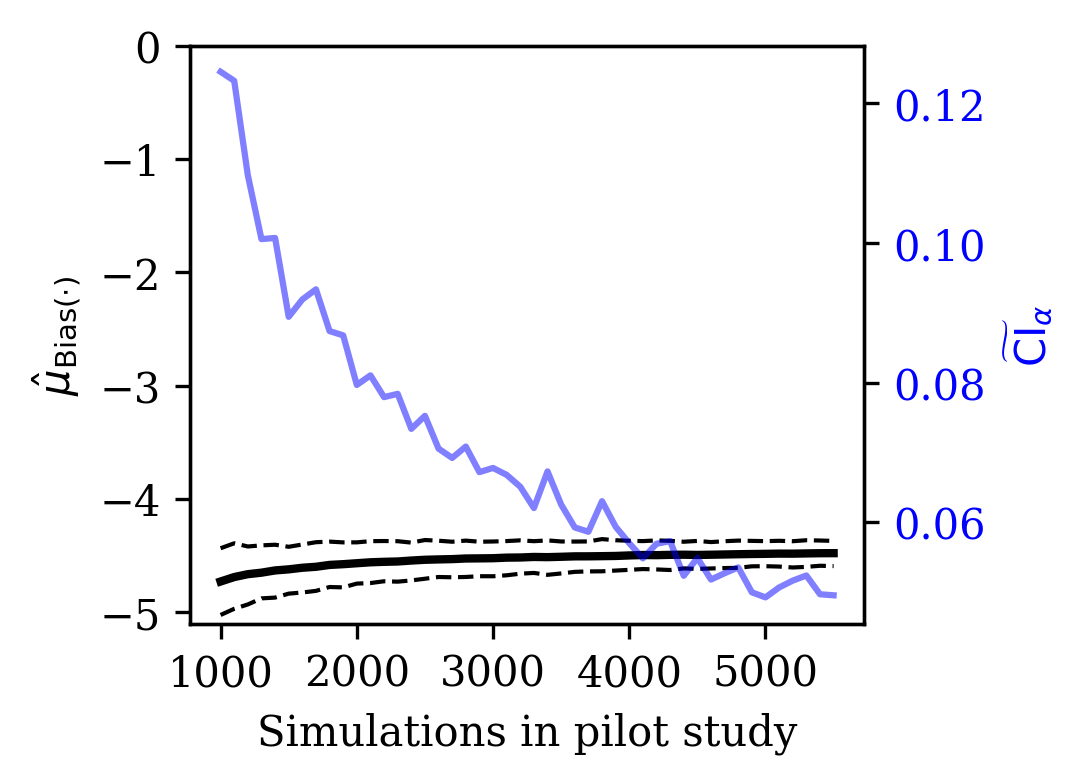

In [17]:
model_selection.plot_bias_evolution()

## Example 2
The following example does not converge by means of $\widetilde{\mathrm{CI}}_{\alpha, lim}=5\%$, becoming an expensive comparison.

In [18]:
m1 = funct(mode="MABE", cost_per_sim=10)
mk2 = funct(mode="other", cost_per_sim=0.05)

model_selection2 = algorithm1.Efficient_model_selection(m1, mk2, alpha=0.05,
                                                    ci_lim=0.05, m=1000,
                                                    B_resamples=1000, W=100,
                                                    increm=100, seed=456)
results2 = model_selection2.run_model_selection_criterion(max_iter=100)

The model did not reach convergence. The estimated bias is  -6.702  and the limiting bias is  6.392 . Gamma_m = 200.0 .
 Check if increasing max_iter or accepting the nonconvergence of the estimator                       is necessary.


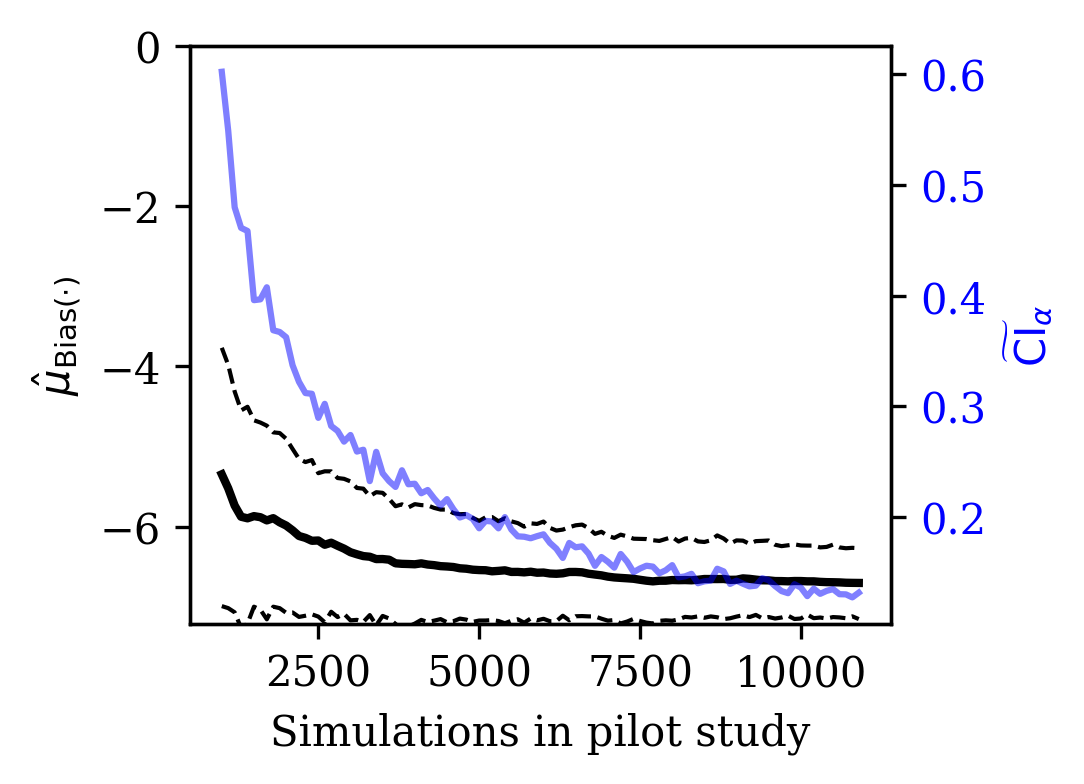

In [19]:
model_selection2.plot_bias_evolution()

### Accepting to stop by means of other criteria
When $\hat{\mu}_{{\mathrm{Bias}} \left( \cdot \right)}$ is near zero, or when the uncertainty in the responses is large, using a maximum length of the confidence interval $\widetilde{\mathrm{CI}}_{length \text{, max}}$ or the maximum number of iterations can be another way to determine acceptable stopping of the comparison.

In [20]:
model_selection2 = algorithm1.Efficient_model_selection(m1, mk2, alpha=0.05,
                                                        ci_lim=0.05, m=1000,
                                                        abs_ci_length_lim = 1,
                                                        B_resamples=1000, W=100,
                                                        increm=100, seed=456)
results2 = model_selection2.run_model_selection_criterion(max_iter=100)

The model reached convergence. The estimated bias is  -6.668  and the limiting bias is  6.418 . Gamma_m = 200.0


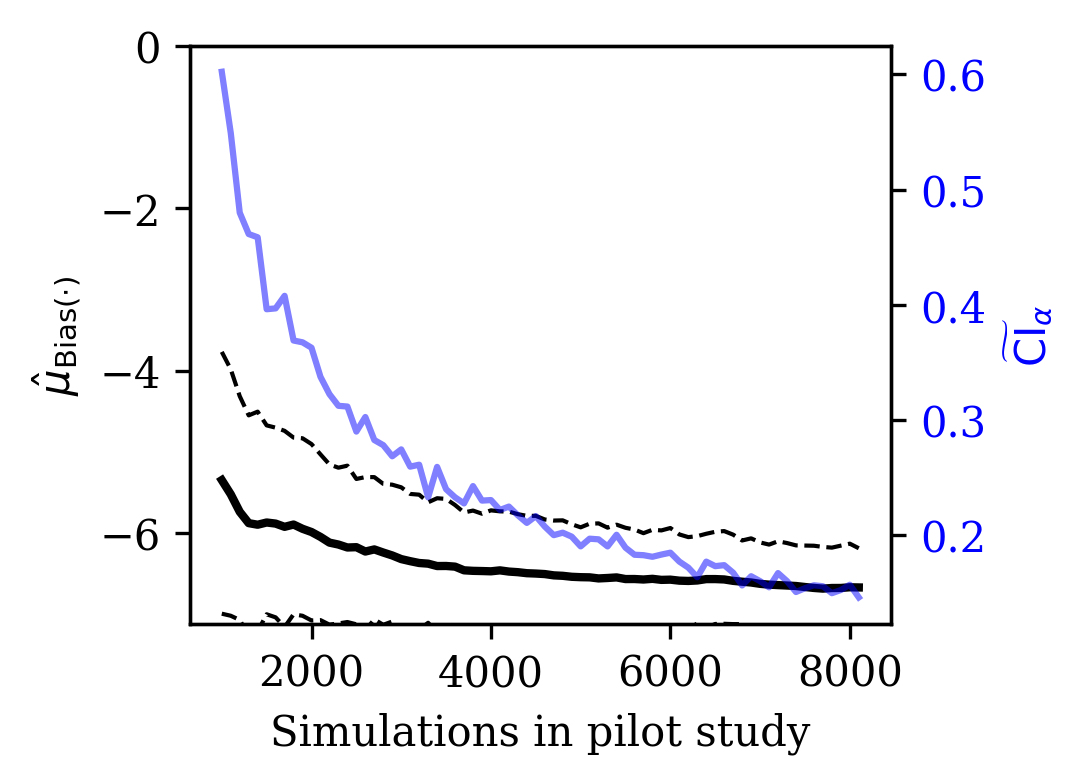

In [21]:
model_selection2.plot_bias_evolution()